### SEGUNDO ESTUDO - UTILIZANDO ÁRVORES RANDÔMICAS

In [1]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Author: Eduardo Albino Gonelli
# importando as bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# importando o dataset
data = pd.read_csv('german.csv', sep = ";")
data.head(5)

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
# separando o target e os dados
target = data['Creditability']
dados = data.drop('Creditability', axis=1)

In [5]:
target

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Creditability, Length: 1000, dtype: int64

In [6]:
dados

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


In [7]:
feature_names = dados.columns

In [8]:
feature_names

Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

In [9]:
# separando os dados em treinamento e teste
X = dados
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# parâmetros para calcular o n_estimators
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500, 1000]
}

In [11]:
# criação do modelo
cls = RandomForestClassifier()
# busca pelo melhor valor de n_estimators
grid_search = GridSearchCV(cls, param_grid, cv=5)
# treinamento do modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200, 500, 1000]})

In [12]:
# para predizer utiliza-se o melhor modelo encontrado
best_cls = grid_search.best_estimator_
# predições
pred = best_cls.predict(X_test)

In [13]:
# cálculo de acurácia
accuracy = accuracy_score(y_test, pred)
print("Acurácia: ", accuracy)

Acurácia:  0.775


In [14]:
print("Melhor valor de n_estimators encontrado: ", grid_search.best_params_['n_estimators'])

Melhor valor de n_estimators encontrado:  500


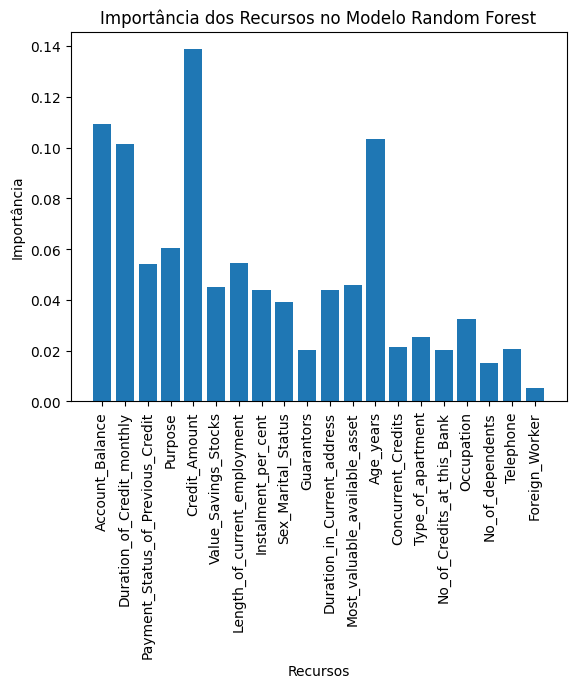

In [15]:
# exemplo da aula para exibir a importância dos recursos
importances = best_cls.feature_importances_
indices = range(len(importances))
plt.bar(indices, importances)
plt.xticks(indices, feature_names, rotation='vertical')
plt.xlabel('Recursos')
plt.ylabel('Importância')
plt.title('Importância dos Recursos no Modelo Random Forest')
plt.show()

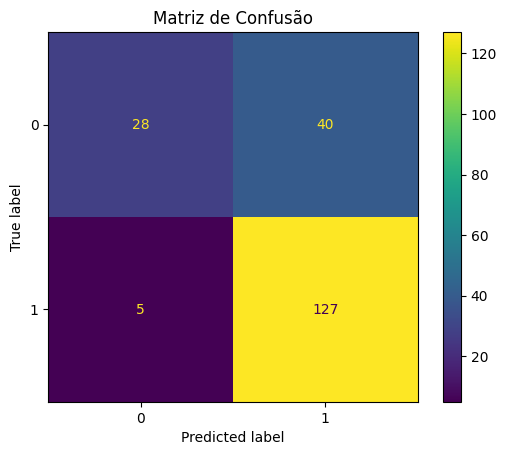

In [16]:
# matriz de confusão
y_pred_test = best_cls.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Matriz de Confusão')
plt.show()

Observa-se que os resultados obtidos até o momento são semelhantes aos resultados da regressão logística. A seguir aplica-se o SMOTE na tentativa de melhorar a acurácia de treinamento.

### BALANCEANDO O DATASET COM O SMOTE

In [17]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [18]:
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200, 500, 1000]})

In [19]:
best_cls2 = grid_search.best_estimator_
pred2 = best_cls2.predict(X_test)

In [20]:
# cálculo de acurácia
accuracy = accuracy_score(y_test, pred2)
print("Acurácia: ", accuracy)

Acurácia:  0.75


In [21]:
print("Melhor valor de n_estimators encontrado: ", grid_search.best_params_['n_estimators'])

Melhor valor de n_estimators encontrado:  50


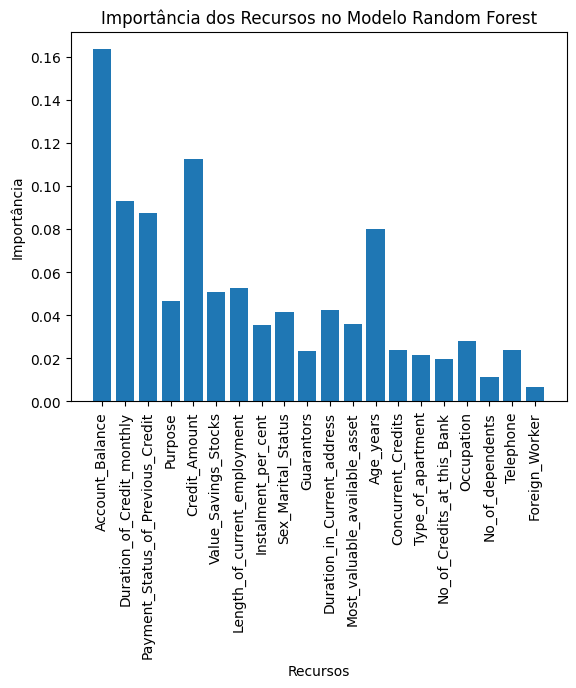

In [22]:
# exemplo da aula para exibir a importância dos recursos
importances = best_cls2.feature_importances_
indices2 = range(len(importances))
plt.bar(indices2, importances)
plt.xticks(indices2, feature_names, rotation='vertical')
plt.xlabel('Recursos')
plt.ylabel('Importância')
plt.title('Importância dos Recursos no Modelo Random Forest')
plt.show()

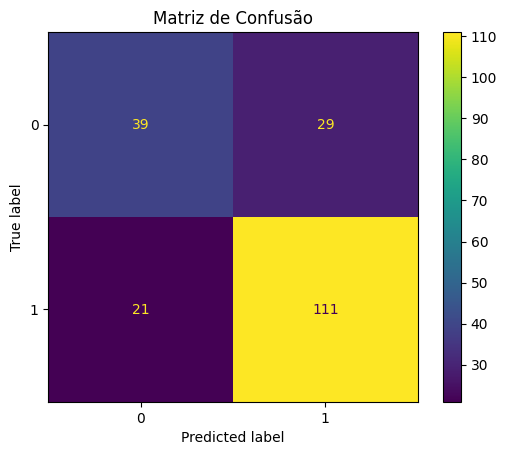

In [23]:
# matriz de confusão
y_pred_test2 = best_cls2.predict(X_test)
conf_matrix2 = confusion_matrix(y_test, y_pred_test2)
ConfusionMatrixDisplay(conf_matrix2).plot()
plt.title('Matriz de Confusão')
plt.show()

In [24]:
# calculando os scores com validação cruzada
# Calcule os scores de validação cruzada (usando acurácia como métrica)
scores = cross_val_score(best_cls2, X, y, cv=5, scoring='accuracy')

# Calcule a média e o desvio padrão dos scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Exiba os resultados
print(f'Acurácia média na validação cruzada: {mean_score}')
print(f'Desvio padrão da acurácia na validação cruzada: {std_score}')

Acurácia média na validação cruzada: 0.7420000000000001
Desvio padrão da acurácia na validação cruzada: 0.05706137047074843


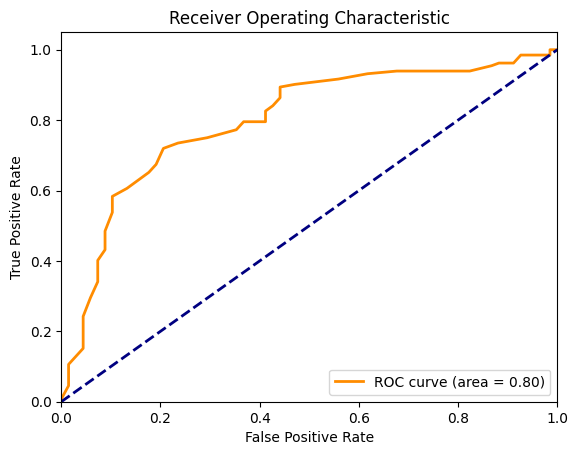

In [25]:
# Calcular a curva ROC
y2_prob = best_cls2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y2_prob)

# Calcular o AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### APLICANDO RFE PARA O MODELO DE RANDOM FOREST COM SMOTE

In [197]:
rfe = RFE(estimator=cls, n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train_smote, y_train_smote)
X_test_rfe = rfe.transform(X_test)

In [198]:
# encontra o melhor valor de n_estimators
grid_search_rfe = GridSearchCV(cls, param_grid, cv=5)
grid_search_rfe.fit(X_train_rfe, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200, 500, 1000]})

In [199]:
# utiliza o modelo encontrado pelo GridSeachCV para predizer o melhor resultado
best_cls_rfe = grid_search_rfe.best_estimator_
pred_rfe = best_cls_rfe.predict(X_test_rfe)

In [200]:
# acurácia
accuracy = accuracy_score(y_test, pred_rfe)
print("Acurácia: ", accuracy)

Acurácia:  0.775


In [201]:
# Imprimindo o melhor valor de n_estimators
print("Melhor valor de n_estimators: ", grid_search_rfe.best_params_['n_estimators'])

Melhor valor de n_estimators:  200


In [202]:
selected_features = [feature for feature, selected in zip(X.columns, rfe.support_) if selected]
print("Características selecionadas:")
print(selected_features)

Características selecionadas:
['Account_Balance', 'Duration_of_Credit_monthly', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Age_years', 'Concurrent_Credits', 'Type_of_apartment', 'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker']


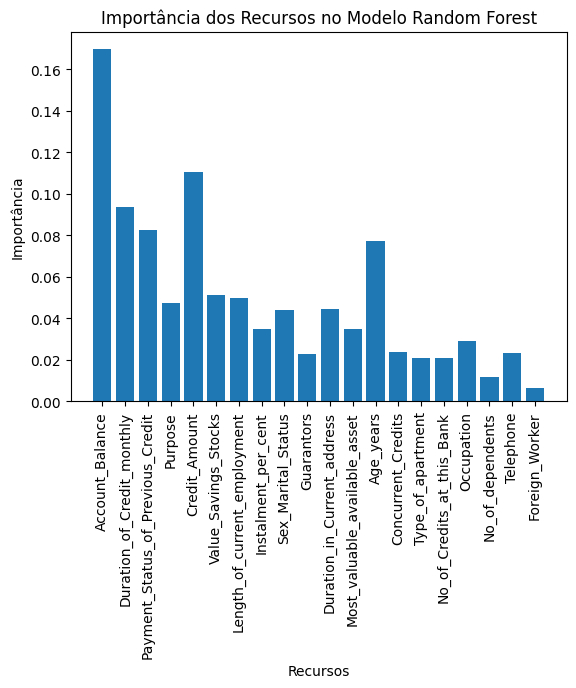

In [203]:
# exemplo da aula para exibir a importância dos recursos
importances3 = best_cls_rfe.feature_importances_
indices3 = range(len(importances3))
plt.bar(indices3, importances3)
plt.xticks(indices3, selected_features, rotation='vertical')
plt.xlabel('Recursos')
plt.ylabel('Importância')
plt.title('Importância dos Recursos no Modelo Random Forest')
plt.show()

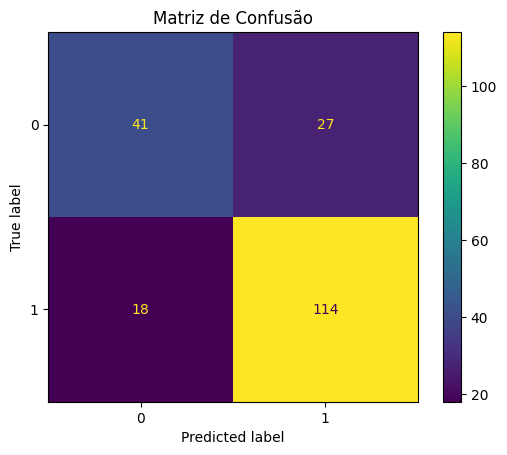

In [204]:
X_test_features = X_test[selected_features].values  # convertendo para array Numpy
y_pred_test3 = best_cls_rfe.predict(X_test_features)
conf_matrix3 = confusion_matrix(y_test, y_pred_test3)
ConfusionMatrixDisplay(conf_matrix3).plot()
plt.title('Matriz de Confusão')
plt.show()

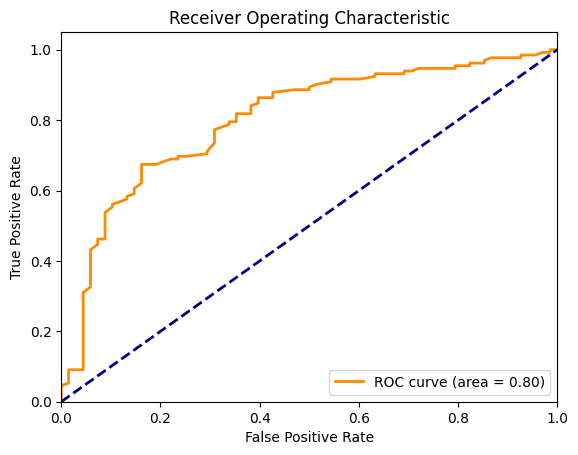

In [205]:
# Calcular a curva ROC
y3_prob = best_cls_rfe.predict_proba(X_test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y3_prob)

# Calcular o AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()